In [1]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
#PIL for opening,resizing and saving images
from PIL import Image
#tqdm for a progress bar when loading the dataset
from tqdm import tqdm


Using TensorFlow backend.


In [2]:
# this is the size of our encoded representations
encoding_dim = 410  

# this is our input placeholder
input_img = Input(shape=(4096,))

# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)

# "decoded" is the lossy reconstruction of the input
decoded = Dense(4096, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

Instructions for updating:
Colocations handled automatically by placer.


In [3]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

In [4]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))

# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]

# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [5]:
images_l = np.load('images.npy')

In [6]:
images_l = images_l.astype('float32') / 255.
image_train = images_l[0:10000]
image_test = images_l[10000:13233]

In [7]:
image_train = image_train.reshape((len(image_train), np.prod(image_train.shape[1:])))
image_test = image_test.reshape((len(image_test), np.prod(image_test.shape[1:])))
print (image_train.shape)
print (image_test.shape)

(10000, 4096)
(3233, 4096)


In [8]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [9]:
autoencoder.fit(image_train, image_train,
                epochs=250,
                batch_size=256,
                shuffle=True,
                validation_data=(image_test, image_test))

Instructions for updating:
Use tf.cast instead.
Train on 10000 samples, validate on 3233 samples
Epoch 1/250
10000/10000 [==============================] - ETA: 58s - loss: 0.69 - ETA: 33s - loss: 0.69 - ETA: 24s - loss: 0.69 - ETA: 19s - loss: 0.69 - ETA: 16s - loss: 0.69 - ETA: 14s - loss: 0.69 - ETA: 12s - loss: 0.69 - ETA: 11s - loss: 0.69 - ETA: 10s - loss: 0.69 - ETA: 9s - loss: 0.6943 - ETA: 8s - loss: 0.694 - ETA: 8s - loss: 0.693 - ETA: 7s - loss: 0.693 - ETA: 7s - loss: 0.693 - ETA: 6s - loss: 0.693 - ETA: 6s - loss: 0.693 - ETA: 6s - loss: 0.693 - ETA: 5s - loss: 0.693 - ETA: 5s - loss: 0.692 - ETA: 4s - loss: 0.692 - ETA: 4s - loss: 0.692 - ETA: 4s - loss: 0.692 - ETA: 4s - loss: 0.692 - ETA: 3s - loss: 0.692 - ETA: 3s - loss: 0.692 - ETA: 3s - loss: 0.692 - ETA: 2s - loss: 0.691 - ETA: 2s - loss: 0.691 - ETA: 2s - loss: 0.691 - ETA: 2s - loss: 0.691 - ETA: 1s - loss: 0.691 - ETA: 1s - loss: 0.691 - ETA: 1s - loss: 0.691 - ETA: 1s - loss: 0.691 - ETA: 0s - loss: 0.690 - ETA

10000/10000 [==============================] - ETA: 6s - loss: 0.610 - ETA: 6s - loss: 0.608 - ETA: 6s - loss: 0.608 - ETA: 6s - loss: 0.608 - ETA: 6s - loss: 0.607 - ETA: 6s - loss: 0.608 - ETA: 5s - loss: 0.609 - ETA: 5s - loss: 0.609 - ETA: 5s - loss: 0.608 - ETA: 5s - loss: 0.608 - ETA: 5s - loss: 0.607 - ETA: 4s - loss: 0.608 - ETA: 4s - loss: 0.608 - ETA: 4s - loss: 0.607 - ETA: 4s - loss: 0.608 - ETA: 4s - loss: 0.608 - ETA: 4s - loss: 0.608 - ETA: 3s - loss: 0.608 - ETA: 3s - loss: 0.608 - ETA: 3s - loss: 0.608 - ETA: 3s - loss: 0.608 - ETA: 3s - loss: 0.608 - ETA: 3s - loss: 0.608 - ETA: 2s - loss: 0.608 - ETA: 2s - loss: 0.608 - ETA: 2s - loss: 0.608 - ETA: 2s - loss: 0.608 - ETA: 2s - loss: 0.608 - ETA: 1s - loss: 0.608 - ETA: 1s - loss: 0.607 - ETA: 1s - loss: 0.607 - ETA: 1s - loss: 0.607 - ETA: 1s - loss: 0.607 - ETA: 0s - loss: 0.607 - ETA: 0s - loss: 0.608 - ETA: 0s - loss: 0.608 - ETA: 0s - loss: 0.608 - ETA: 0s - loss: 0.608 - ETA: 0s - loss: 0.608 - 8s 789us/step - l

10000/10000 [==============================] - ETA: 6s - loss: 0.592 - ETA: 7s - loss: 0.595 - ETA: 6s - loss: 0.596 - ETA: 6s - loss: 0.596 - ETA: 6s - loss: 0.595 - ETA: 6s - loss: 0.593 - ETA: 5s - loss: 0.593 - ETA: 5s - loss: 0.593 - ETA: 5s - loss: 0.593 - ETA: 5s - loss: 0.593 - ETA: 5s - loss: 0.593 - ETA: 5s - loss: 0.593 - ETA: 5s - loss: 0.593 - ETA: 4s - loss: 0.592 - ETA: 4s - loss: 0.592 - ETA: 4s - loss: 0.592 - ETA: 4s - loss: 0.592 - ETA: 4s - loss: 0.592 - ETA: 3s - loss: 0.591 - ETA: 3s - loss: 0.591 - ETA: 3s - loss: 0.591 - ETA: 3s - loss: 0.591 - ETA: 3s - loss: 0.591 - ETA: 2s - loss: 0.591 - ETA: 2s - loss: 0.591 - ETA: 2s - loss: 0.590 - ETA: 2s - loss: 0.590 - ETA: 2s - loss: 0.590 - ETA: 2s - loss: 0.590 - ETA: 1s - loss: 0.591 - ETA: 1s - loss: 0.590 - ETA: 1s - loss: 0.590 - ETA: 1s - loss: 0.590 - ETA: 1s - loss: 0.590 - ETA: 0s - loss: 0.590 - ETA: 0s - loss: 0.590 - ETA: 0s - loss: 0.590 - ETA: 0s - loss: 0.590 - ETA: 0s - loss: 0.590 - 9s 871us/step - l

10000/10000 [==============================] - ETA: 6s - loss: 0.582 - ETA: 6s - loss: 0.581 - ETA: 6s - loss: 0.580 - ETA: 5s - loss: 0.580 - ETA: 5s - loss: 0.581 - ETA: 5s - loss: 0.580 - ETA: 5s - loss: 0.581 - ETA: 5s - loss: 0.580 - ETA: 5s - loss: 0.580 - ETA: 5s - loss: 0.579 - ETA: 5s - loss: 0.579 - ETA: 4s - loss: 0.579 - ETA: 4s - loss: 0.578 - ETA: 4s - loss: 0.578 - ETA: 4s - loss: 0.578 - ETA: 4s - loss: 0.578 - ETA: 4s - loss: 0.577 - ETA: 3s - loss: 0.578 - ETA: 3s - loss: 0.578 - ETA: 3s - loss: 0.578 - ETA: 3s - loss: 0.579 - ETA: 3s - loss: 0.578 - ETA: 3s - loss: 0.578 - ETA: 2s - loss: 0.578 - ETA: 2s - loss: 0.579 - ETA: 2s - loss: 0.579 - ETA: 2s - loss: 0.579 - ETA: 2s - loss: 0.579 - ETA: 1s - loss: 0.579 - ETA: 1s - loss: 0.578 - ETA: 1s - loss: 0.578 - ETA: 1s - loss: 0.578 - ETA: 1s - loss: 0.578 - ETA: 0s - loss: 0.578 - ETA: 0s - loss: 0.578 - ETA: 0s - loss: 0.578 - ETA: 0s - loss: 0.578 - ETA: 0s - loss: 0.578 - ETA: 0s - loss: 0.578 - 8s 822us/step - l

10000/10000 [==============================] - ETA: 6s - loss: 0.571 - ETA: 6s - loss: 0.571 - ETA: 6s - loss: 0.565 - ETA: 6s - loss: 0.567 - ETA: 6s - loss: 0.568 - ETA: 5s - loss: 0.569 - ETA: 5s - loss: 0.570 - ETA: 5s - loss: 0.571 - ETA: 5s - loss: 0.570 - ETA: 5s - loss: 0.569 - ETA: 5s - loss: 0.570 - ETA: 5s - loss: 0.569 - ETA: 5s - loss: 0.570 - ETA: 4s - loss: 0.570 - ETA: 4s - loss: 0.570 - ETA: 4s - loss: 0.570 - ETA: 4s - loss: 0.569 - ETA: 4s - loss: 0.569 - ETA: 3s - loss: 0.570 - ETA: 3s - loss: 0.570 - ETA: 3s - loss: 0.570 - ETA: 3s - loss: 0.570 - ETA: 3s - loss: 0.571 - ETA: 2s - loss: 0.570 - ETA: 2s - loss: 0.570 - ETA: 2s - loss: 0.570 - ETA: 2s - loss: 0.570 - ETA: 2s - loss: 0.570 - ETA: 1s - loss: 0.570 - ETA: 1s - loss: 0.570 - ETA: 1s - loss: 0.570 - ETA: 1s - loss: 0.570 - ETA: 1s - loss: 0.570 - ETA: 1s - loss: 0.570 - ETA: 0s - loss: 0.570 - ETA: 0s - loss: 0.570 - ETA: 0s - loss: 0.570 - ETA: 0s - loss: 0.570 - ETA: 0s - loss: 0.570 - 8s 847us/step - l

10000/10000 [==============================] - ETA: 6s - loss: 0.574 - ETA: 6s - loss: 0.572 - ETA: 6s - loss: 0.570 - ETA: 6s - loss: 0.568 - ETA: 6s - loss: 0.568 - ETA: 6s - loss: 0.567 - ETA: 5s - loss: 0.566 - ETA: 5s - loss: 0.564 - ETA: 5s - loss: 0.564 - ETA: 5s - loss: 0.564 - ETA: 5s - loss: 0.564 - ETA: 5s - loss: 0.564 - ETA: 4s - loss: 0.564 - ETA: 4s - loss: 0.565 - ETA: 4s - loss: 0.564 - ETA: 4s - loss: 0.564 - ETA: 4s - loss: 0.564 - ETA: 3s - loss: 0.564 - ETA: 3s - loss: 0.564 - ETA: 3s - loss: 0.564 - ETA: 3s - loss: 0.564 - ETA: 3s - loss: 0.564 - ETA: 2s - loss: 0.564 - ETA: 2s - loss: 0.564 - ETA: 2s - loss: 0.564 - ETA: 2s - loss: 0.564 - ETA: 2s - loss: 0.564 - ETA: 2s - loss: 0.564 - ETA: 1s - loss: 0.564 - ETA: 1s - loss: 0.564 - ETA: 1s - loss: 0.564 - ETA: 1s - loss: 0.564 - ETA: 1s - loss: 0.564 - ETA: 0s - loss: 0.564 - ETA: 0s - loss: 0.564 - ETA: 0s - loss: 0.564 - ETA: 0s - loss: 0.564 - ETA: 0s - loss: 0.564 - ETA: 0s - loss: 0.564 - 8s 848us/step - l

10000/10000 [==============================] - ETA: 6s - loss: 0.554 - ETA: 6s - loss: 0.561 - ETA: 6s - loss: 0.566 - ETA: 6s - loss: 0.564 - ETA: 6s - loss: 0.561 - ETA: 5s - loss: 0.560 - ETA: 5s - loss: 0.562 - ETA: 5s - loss: 0.561 - ETA: 5s - loss: 0.561 - ETA: 5s - loss: 0.560 - ETA: 4s - loss: 0.561 - ETA: 4s - loss: 0.561 - ETA: 4s - loss: 0.561 - ETA: 4s - loss: 0.561 - ETA: 4s - loss: 0.561 - ETA: 4s - loss: 0.561 - ETA: 3s - loss: 0.561 - ETA: 3s - loss: 0.561 - ETA: 3s - loss: 0.561 - ETA: 3s - loss: 0.561 - ETA: 3s - loss: 0.561 - ETA: 3s - loss: 0.561 - ETA: 2s - loss: 0.561 - ETA: 2s - loss: 0.560 - ETA: 2s - loss: 0.560 - ETA: 2s - loss: 0.560 - ETA: 2s - loss: 0.560 - ETA: 2s - loss: 0.560 - ETA: 1s - loss: 0.560 - ETA: 1s - loss: 0.560 - ETA: 1s - loss: 0.560 - ETA: 1s - loss: 0.560 - ETA: 1s - loss: 0.560 - ETA: 0s - loss: 0.560 - ETA: 0s - loss: 0.559 - ETA: 0s - loss: 0.559 - ETA: 0s - loss: 0.559 - ETA: 0s - loss: 0.560 - ETA: 0s - loss: 0.560 - 8s 818us/step - l

10000/10000 [==============================] - ETA: 8s - loss: 0.554 - ETA: 8s - loss: 0.554 - ETA: 8s - loss: 0.552 - ETA: 8s - loss: 0.552 - ETA: 7s - loss: 0.554 - ETA: 7s - loss: 0.554 - ETA: 7s - loss: 0.555 - ETA: 7s - loss: 0.555 - ETA: 6s - loss: 0.555 - ETA: 6s - loss: 0.556 - ETA: 6s - loss: 0.555 - ETA: 6s - loss: 0.555 - ETA: 5s - loss: 0.555 - ETA: 5s - loss: 0.556 - ETA: 5s - loss: 0.556 - ETA: 4s - loss: 0.556 - ETA: 4s - loss: 0.556 - ETA: 4s - loss: 0.556 - ETA: 4s - loss: 0.556 - ETA: 4s - loss: 0.556 - ETA: 3s - loss: 0.556 - ETA: 3s - loss: 0.556 - ETA: 3s - loss: 0.556 - ETA: 3s - loss: 0.556 - ETA: 3s - loss: 0.556 - ETA: 2s - loss: 0.556 - ETA: 2s - loss: 0.556 - ETA: 2s - loss: 0.556 - ETA: 2s - loss: 0.556 - ETA: 1s - loss: 0.556 - ETA: 1s - loss: 0.556 - ETA: 1s - loss: 0.556 - ETA: 1s - loss: 0.556 - ETA: 1s - loss: 0.556 - ETA: 0s - loss: 0.556 - ETA: 0s - loss: 0.556 - ETA: 0s - loss: 0.556 - ETA: 0s - loss: 0.556 - ETA: 0s - loss: 0.556 - 9s 922us/step - l

10000/10000 [==============================] - ETA: 7s - loss: 0.545 - ETA: 7s - loss: 0.549 - ETA: 7s - loss: 0.549 - ETA: 6s - loss: 0.551 - ETA: 6s - loss: 0.551 - ETA: 6s - loss: 0.551 - ETA: 6s - loss: 0.552 - ETA: 5s - loss: 0.551 - ETA: 5s - loss: 0.552 - ETA: 5s - loss: 0.552 - ETA: 5s - loss: 0.552 - ETA: 5s - loss: 0.553 - ETA: 5s - loss: 0.552 - ETA: 4s - loss: 0.552 - ETA: 4s - loss: 0.552 - ETA: 4s - loss: 0.552 - ETA: 4s - loss: 0.552 - ETA: 4s - loss: 0.552 - ETA: 3s - loss: 0.552 - ETA: 3s - loss: 0.552 - ETA: 3s - loss: 0.553 - ETA: 3s - loss: 0.553 - ETA: 3s - loss: 0.553 - ETA: 2s - loss: 0.553 - ETA: 2s - loss: 0.553 - ETA: 2s - loss: 0.553 - ETA: 2s - loss: 0.553 - ETA: 2s - loss: 0.553 - ETA: 1s - loss: 0.553 - ETA: 1s - loss: 0.553 - ETA: 1s - loss: 0.554 - ETA: 1s - loss: 0.554 - ETA: 1s - loss: 0.554 - ETA: 0s - loss: 0.553 - ETA: 0s - loss: 0.553 - ETA: 0s - loss: 0.553 - ETA: 0s - loss: 0.553 - ETA: 0s - loss: 0.553 - ETA: 0s - loss: 0.553 - 8s 821us/step - l

10000/10000 [==============================] - ETA: 6s - loss: 0.551 - ETA: 6s - loss: 0.554 - ETA: 6s - loss: 0.552 - ETA: 6s - loss: 0.550 - ETA: 6s - loss: 0.551 - ETA: 5s - loss: 0.551 - ETA: 5s - loss: 0.552 - ETA: 5s - loss: 0.552 - ETA: 5s - loss: 0.552 - ETA: 5s - loss: 0.553 - ETA: 5s - loss: 0.553 - ETA: 4s - loss: 0.552 - ETA: 4s - loss: 0.552 - ETA: 4s - loss: 0.552 - ETA: 4s - loss: 0.552 - ETA: 4s - loss: 0.552 - ETA: 4s - loss: 0.552 - ETA: 3s - loss: 0.552 - ETA: 3s - loss: 0.551 - ETA: 3s - loss: 0.551 - ETA: 3s - loss: 0.552 - ETA: 3s - loss: 0.552 - ETA: 2s - loss: 0.552 - ETA: 2s - loss: 0.552 - ETA: 2s - loss: 0.552 - ETA: 2s - loss: 0.551 - ETA: 2s - loss: 0.551 - ETA: 2s - loss: 0.551 - ETA: 1s - loss: 0.551 - ETA: 1s - loss: 0.551 - ETA: 1s - loss: 0.551 - ETA: 1s - loss: 0.551 - ETA: 1s - loss: 0.551 - ETA: 0s - loss: 0.550 - ETA: 0s - loss: 0.551 - ETA: 0s - loss: 0.551 - ETA: 0s - loss: 0.551 - ETA: 0s - loss: 0.551 - ETA: 0s - loss: 0.550 - 8s 823us/step - l

10000/10000 [==============================] - ETA: 6s - loss: 0.555 - ETA: 6s - loss: 0.552 - ETA: 6s - loss: 0.551 - ETA: 6s - loss: 0.550 - ETA: 6s - loss: 0.549 - ETA: 6s - loss: 0.547 - ETA: 5s - loss: 0.548 - ETA: 5s - loss: 0.548 - ETA: 5s - loss: 0.548 - ETA: 5s - loss: 0.547 - ETA: 5s - loss: 0.547 - ETA: 4s - loss: 0.547 - ETA: 4s - loss: 0.547 - ETA: 4s - loss: 0.548 - ETA: 4s - loss: 0.548 - ETA: 4s - loss: 0.548 - ETA: 4s - loss: 0.548 - ETA: 3s - loss: 0.548 - ETA: 3s - loss: 0.548 - ETA: 3s - loss: 0.549 - ETA: 3s - loss: 0.549 - ETA: 3s - loss: 0.549 - ETA: 2s - loss: 0.549 - ETA: 2s - loss: 0.549 - ETA: 2s - loss: 0.549 - ETA: 2s - loss: 0.549 - ETA: 2s - loss: 0.549 - ETA: 2s - loss: 0.549 - ETA: 1s - loss: 0.549 - ETA: 1s - loss: 0.549 - ETA: 1s - loss: 0.548 - ETA: 1s - loss: 0.549 - ETA: 1s - loss: 0.549 - ETA: 0s - loss: 0.548 - ETA: 0s - loss: 0.548 - ETA: 0s - loss: 0.548 - ETA: 0s - loss: 0.548 - ETA: 0s - loss: 0.548 - ETA: 0s - loss: 0.548 - 8s 795us/step - l

10000/10000 [==============================] - ETA: 7s - loss: 0.542 - ETA: 7s - loss: 0.542 - ETA: 7s - loss: 0.544 - ETA: 7s - loss: 0.546 - ETA: 6s - loss: 0.548 - ETA: 6s - loss: 0.548 - ETA: 6s - loss: 0.549 - ETA: 6s - loss: 0.549 - ETA: 6s - loss: 0.549 - ETA: 5s - loss: 0.548 - ETA: 5s - loss: 0.548 - ETA: 5s - loss: 0.548 - ETA: 5s - loss: 0.548 - ETA: 5s - loss: 0.548 - ETA: 4s - loss: 0.548 - ETA: 4s - loss: 0.547 - ETA: 4s - loss: 0.547 - ETA: 4s - loss: 0.546 - ETA: 4s - loss: 0.546 - ETA: 3s - loss: 0.546 - ETA: 3s - loss: 0.546 - ETA: 3s - loss: 0.546 - ETA: 3s - loss: 0.546 - ETA: 3s - loss: 0.546 - ETA: 2s - loss: 0.546 - ETA: 2s - loss: 0.546 - ETA: 2s - loss: 0.546 - ETA: 2s - loss: 0.546 - ETA: 2s - loss: 0.546 - ETA: 1s - loss: 0.546 - ETA: 1s - loss: 0.546 - ETA: 1s - loss: 0.547 - ETA: 1s - loss: 0.547 - ETA: 1s - loss: 0.547 - ETA: 0s - loss: 0.546 - ETA: 0s - loss: 0.546 - ETA: 0s - loss: 0.546 - ETA: 0s - loss: 0.546 - ETA: 0s - loss: 0.546 - 9s 864us/step - l

10000/10000 [==============================] - ETA: 7s - loss: 0.544 - ETA: 6s - loss: 0.544 - ETA: 6s - loss: 0.544 - ETA: 6s - loss: 0.545 - ETA: 6s - loss: 0.544 - ETA: 6s - loss: 0.545 - ETA: 5s - loss: 0.546 - ETA: 5s - loss: 0.544 - ETA: 5s - loss: 0.545 - ETA: 5s - loss: 0.545 - ETA: 5s - loss: 0.545 - ETA: 4s - loss: 0.545 - ETA: 4s - loss: 0.544 - ETA: 4s - loss: 0.545 - ETA: 4s - loss: 0.545 - ETA: 4s - loss: 0.545 - ETA: 4s - loss: 0.545 - ETA: 3s - loss: 0.545 - ETA: 3s - loss: 0.545 - ETA: 3s - loss: 0.545 - ETA: 3s - loss: 0.545 - ETA: 3s - loss: 0.545 - ETA: 3s - loss: 0.544 - ETA: 2s - loss: 0.544 - ETA: 2s - loss: 0.544 - ETA: 2s - loss: 0.544 - ETA: 2s - loss: 0.544 - ETA: 2s - loss: 0.544 - ETA: 1s - loss: 0.544 - ETA: 1s - loss: 0.545 - ETA: 1s - loss: 0.545 - ETA: 1s - loss: 0.544 - ETA: 1s - loss: 0.544 - ETA: 0s - loss: 0.544 - ETA: 0s - loss: 0.544 - ETA: 0s - loss: 0.544 - ETA: 0s - loss: 0.544 - ETA: 0s - loss: 0.545 - ETA: 0s - loss: 0.544 - 8s 814us/step - l

10000/10000 [==============================] - ETA: 6s - loss: 0.553 - ETA: 6s - loss: 0.546 - ETA: 6s - loss: 0.545 - ETA: 6s - loss: 0.544 - ETA: 6s - loss: 0.544 - ETA: 6s - loss: 0.543 - ETA: 5s - loss: 0.543 - ETA: 5s - loss: 0.544 - ETA: 5s - loss: 0.545 - ETA: 5s - loss: 0.545 - ETA: 5s - loss: 0.545 - ETA: 4s - loss: 0.544 - ETA: 4s - loss: 0.544 - ETA: 4s - loss: 0.544 - ETA: 4s - loss: 0.544 - ETA: 4s - loss: 0.543 - ETA: 4s - loss: 0.543 - ETA: 3s - loss: 0.543 - ETA: 3s - loss: 0.543 - ETA: 3s - loss: 0.543 - ETA: 3s - loss: 0.543 - ETA: 3s - loss: 0.543 - ETA: 2s - loss: 0.543 - ETA: 2s - loss: 0.543 - ETA: 2s - loss: 0.543 - ETA: 2s - loss: 0.543 - ETA: 2s - loss: 0.543 - ETA: 2s - loss: 0.543 - ETA: 1s - loss: 0.543 - ETA: 1s - loss: 0.542 - ETA: 1s - loss: 0.542 - ETA: 1s - loss: 0.542 - ETA: 1s - loss: 0.542 - ETA: 0s - loss: 0.543 - ETA: 0s - loss: 0.543 - ETA: 0s - loss: 0.543 - ETA: 0s - loss: 0.543 - ETA: 0s - loss: 0.543 - ETA: 0s - loss: 0.543 - 8s 805us/step - l

10000/10000 [==============================] - ETA: 6s - loss: 0.547 - ETA: 6s - loss: 0.544 - ETA: 6s - loss: 0.544 - ETA: 6s - loss: 0.543 - ETA: 6s - loss: 0.542 - ETA: 5s - loss: 0.542 - ETA: 5s - loss: 0.541 - ETA: 5s - loss: 0.540 - ETA: 5s - loss: 0.540 - ETA: 5s - loss: 0.541 - ETA: 5s - loss: 0.541 - ETA: 4s - loss: 0.541 - ETA: 4s - loss: 0.541 - ETA: 4s - loss: 0.540 - ETA: 4s - loss: 0.540 - ETA: 4s - loss: 0.541 - ETA: 3s - loss: 0.541 - ETA: 3s - loss: 0.541 - ETA: 3s - loss: 0.541 - ETA: 3s - loss: 0.540 - ETA: 3s - loss: 0.540 - ETA: 3s - loss: 0.541 - ETA: 2s - loss: 0.540 - ETA: 2s - loss: 0.541 - ETA: 2s - loss: 0.541 - ETA: 2s - loss: 0.541 - ETA: 2s - loss: 0.541 - ETA: 2s - loss: 0.541 - ETA: 1s - loss: 0.541 - ETA: 1s - loss: 0.541 - ETA: 1s - loss: 0.541 - ETA: 1s - loss: 0.541 - ETA: 1s - loss: 0.541 - ETA: 0s - loss: 0.541 - ETA: 0s - loss: 0.541 - ETA: 0s - loss: 0.541 - ETA: 0s - loss: 0.541 - ETA: 0s - loss: 0.541 - ETA: 0s - loss: 0.541 - 8s 803us/step - l

10000/10000 [==============================] - ETA: 6s - loss: 0.541 - ETA: 6s - loss: 0.538 - ETA: 6s - loss: 0.541 - ETA: 6s - loss: 0.540 - ETA: 6s - loss: 0.540 - ETA: 5s - loss: 0.539 - ETA: 5s - loss: 0.541 - ETA: 5s - loss: 0.540 - ETA: 5s - loss: 0.540 - ETA: 5s - loss: 0.540 - ETA: 5s - loss: 0.540 - ETA: 4s - loss: 0.540 - ETA: 4s - loss: 0.540 - ETA: 4s - loss: 0.540 - ETA: 4s - loss: 0.540 - ETA: 4s - loss: 0.540 - ETA: 4s - loss: 0.540 - ETA: 3s - loss: 0.540 - ETA: 3s - loss: 0.540 - ETA: 3s - loss: 0.540 - ETA: 3s - loss: 0.540 - ETA: 3s - loss: 0.540 - ETA: 2s - loss: 0.540 - ETA: 2s - loss: 0.540 - ETA: 2s - loss: 0.540 - ETA: 2s - loss: 0.540 - ETA: 2s - loss: 0.540 - ETA: 2s - loss: 0.540 - ETA: 1s - loss: 0.540 - ETA: 1s - loss: 0.540 - ETA: 1s - loss: 0.540 - ETA: 1s - loss: 0.540 - ETA: 1s - loss: 0.540 - ETA: 0s - loss: 0.540 - ETA: 0s - loss: 0.540 - ETA: 0s - loss: 0.540 - ETA: 0s - loss: 0.540 - ETA: 0s - loss: 0.540 - ETA: 0s - loss: 0.540 - 8s 790us/step - l

10000/10000 [==============================] - ETA: 6s - loss: 0.533 - ETA: 6s - loss: 0.537 - ETA: 6s - loss: 0.538 - ETA: 6s - loss: 0.539 - ETA: 5s - loss: 0.540 - ETA: 5s - loss: 0.540 - ETA: 5s - loss: 0.541 - ETA: 5s - loss: 0.540 - ETA: 5s - loss: 0.541 - ETA: 5s - loss: 0.541 - ETA: 4s - loss: 0.540 - ETA: 4s - loss: 0.540 - ETA: 4s - loss: 0.539 - ETA: 4s - loss: 0.539 - ETA: 4s - loss: 0.539 - ETA: 4s - loss: 0.539 - ETA: 3s - loss: 0.539 - ETA: 3s - loss: 0.539 - ETA: 3s - loss: 0.539 - ETA: 3s - loss: 0.539 - ETA: 3s - loss: 0.539 - ETA: 3s - loss: 0.539 - ETA: 2s - loss: 0.539 - ETA: 2s - loss: 0.539 - ETA: 2s - loss: 0.539 - ETA: 2s - loss: 0.539 - ETA: 2s - loss: 0.539 - ETA: 1s - loss: 0.539 - ETA: 1s - loss: 0.539 - ETA: 1s - loss: 0.539 - ETA: 1s - loss: 0.539 - ETA: 1s - loss: 0.539 - ETA: 1s - loss: 0.539 - ETA: 0s - loss: 0.539 - ETA: 0s - loss: 0.539 - ETA: 0s - loss: 0.539 - ETA: 0s - loss: 0.539 - ETA: 0s - loss: 0.539 - ETA: 0s - loss: 0.538 - 8s 771us/step - l

10000/10000 [==============================] - ETA: 10s - loss: 0.53 - ETA: 10s - loss: 0.54 - ETA: 11s - loss: 0.53 - ETA: 10s - loss: 0.53 - ETA: 10s - loss: 0.54 - ETA: 9s - loss: 0.5413 - ETA: 9s - loss: 0.540 - ETA: 8s - loss: 0.540 - ETA: 8s - loss: 0.540 - ETA: 7s - loss: 0.540 - ETA: 7s - loss: 0.539 - ETA: 6s - loss: 0.539 - ETA: 6s - loss: 0.539 - ETA: 6s - loss: 0.539 - ETA: 5s - loss: 0.539 - ETA: 5s - loss: 0.539 - ETA: 5s - loss: 0.539 - ETA: 4s - loss: 0.539 - ETA: 4s - loss: 0.539 - ETA: 4s - loss: 0.539 - ETA: 4s - loss: 0.538 - ETA: 3s - loss: 0.538 - ETA: 3s - loss: 0.538 - ETA: 3s - loss: 0.538 - ETA: 3s - loss: 0.538 - ETA: 2s - loss: 0.538 - ETA: 2s - loss: 0.538 - ETA: 2s - loss: 0.537 - ETA: 2s - loss: 0.537 - ETA: 1s - loss: 0.537 - ETA: 1s - loss: 0.538 - ETA: 1s - loss: 0.537 - ETA: 1s - loss: 0.537 - ETA: 1s - loss: 0.537 - ETA: 0s - loss: 0.537 - ETA: 0s - loss: 0.537 - ETA: 0s - loss: 0.537 - ETA: 0s - loss: 0.537 - ETA: 0s - loss: 0.537 - 9s 922us/step - 

In [10]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(image_test)
decoded_imgs = decoder.predict(encoded_imgs)

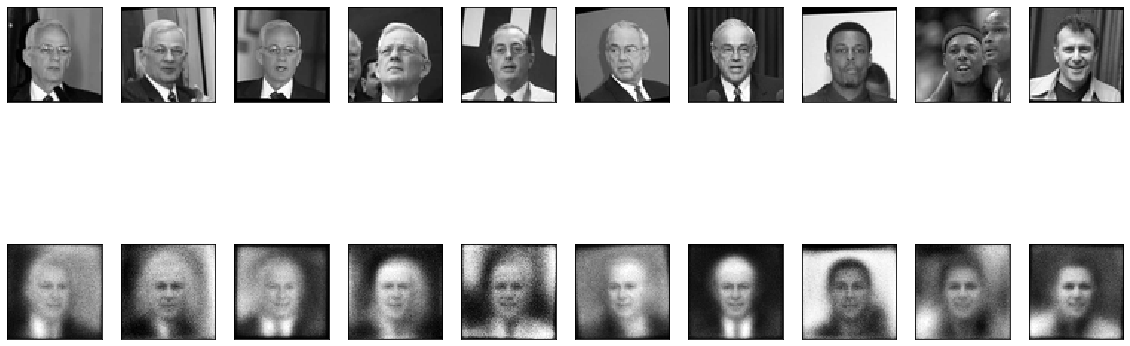

In [11]:
# DESPUES DE 100 EPOCAS Y ENCODING DIM = 168
n = 10  # how many digits we will display
plt.figure(figsize=(20, 8))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(image_test[i].reshape(64, 64))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(64, 64))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
# Saving the model
autoencoder.save('autoencoder2.h5') #this one with encod_dim = 405

In [12]:
loss_list = autoencoder.history.history['val_loss']

In [13]:
len(loss_list)

250

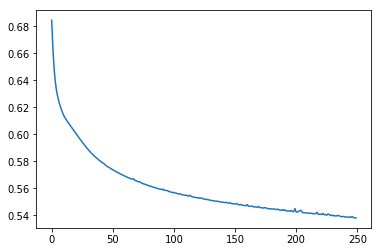

In [14]:
plt.plot(range(len(loss_list)),loss_list)

In [16]:
import os 

def get_training_data(datafolder):
        print("Loading training data...")

        training_data = []
        #Finds all files in datafolder
        foldernames = os.listdir(datafolder)
#         print(foldernames)
        for foldername in tqdm(foldernames):
            folder_path = os.path.join(datafolder, foldername)
            filenames = os.listdir(folder_path)
            folder = foldername
            for filename in tqdm(filenames):
                
                #Combines folder name and file name.
                path = os.path.join(datafolder,folder, filename)
                print(path)
                
                #Opens an image as an Image object.
                image = Image.open(path)
                
                #Resizes to a desired size.
                image = image.resize((64,64),Image.ANTIALIAS)
                
                #Creates an array of pixel values from the image.
                pixel_array = np.asarray(image)
                print(type(pixel_array))
                print(pixel_array.shape)
                training_data.append(pixel_array)

        #training_data is converted to a numpy array
        training_data = np.asarray(training_data)
#         training_data = np.reshape(training_data,(-1,64,64,1))
        return training_data

In [ ]:
from keras.models import load_model

model = load_model('autoencoder2.h5')

In [18]:

imgs = get_training_data('../data/test2/')

Loading training data...


  0%|                                                                                           | 0/38 [00:00<?, ?it/s]

../data/test2/dog\119.jpg
<class 'numpy.ndarray'>
(64, 64, 3)
../data/test2/dog\137.jpg
<class 'numpy.ndarray'>
(64, 64, 3)
../data/test2/dog\18.jpg
<class 'numpy.ndarray'>
(64, 64, 3)



  8%|██████▌                                                                            | 3/38 [00:00<00:01, 26.16it/s]

../data/test2/dog\182.jpg
<class 'numpy.ndarray'>
(64, 64, 3)
../data/test2/dog\2.jpg
<class 'numpy.ndarray'>
(64, 64, 3)
../data/test2/dog\215.jpg
<class 'numpy.ndarray'>
(64, 64, 3)
../data/test2/dog\23.jpg
<class 'numpy.ndarray'>
(64, 64, 3)
../data/test2/dog\242.jpg
<class 'numpy.ndarray'>
(64, 64, 3)
../data/test2/dog\247.jpg
<class 'numpy.ndarray'>
(64, 64, 3)
../data/test2/dog\27.jpg
<class 'numpy.ndarray'>
(64, 64, 3)



 26%|█████████████████████▌                                                            | 10/38 [00:00<00:00, 31.97it/s]

../data/test2/dog\3.jpg
<class 'numpy.ndarray'>
(64, 64, 3)
../data/test2/dog\385.jpg
<class 'numpy.ndarray'>
(64, 64, 3)
../data/test2/dog\397.jpg
<class 'numpy.ndarray'>
(64, 64, 3)
../data/test2/dog\423.jpg
<class 'numpy.ndarray'>
(64, 64, 3)
../data/test2/dog\435.jpg
<class 'numpy.ndarray'>
(64, 64, 3)
../data/test2/dog\534.jpg
<class 'numpy.ndarray'>
(64, 64, 3)
../data/test2/dog\540.jpg
<class 'numpy.ndarray'>
(64, 64, 3)
../data/test2/dog\582.jpg
<class 'numpy.ndarray'>
(64, 64, 3)



 47%|██████████████████████████████████████▊                                           | 18/38 [00:00<00:00, 38.49it/s]

../data/test2/dog\632.jpg
<class 'numpy.ndarray'>
(64, 64, 3)
../data/test2/dog\667.jpg
<class 'numpy.ndarray'>
(64, 64, 3)
../data/test2/dog\688.jpg
<class 'numpy.ndarray'>
(64, 64, 3)
../data/test2/dog\73.jpg
<class 'numpy.ndarray'>
(64, 64, 3)
../data/test2/dog\735.jpg
<class 'numpy.ndarray'>
(64, 64, 3)
../data/test2/dog\78.jpg
<class 'numpy.ndarray'>
(64, 64, 3)



 63%|███████████████████████████████████████████████████▊                              | 24/38 [00:00<00:00, 42.33it/s]

../data/test2/dog\87876.jpg
<class 'numpy.ndarray'>
(64, 64, 3)
../data/test2/dog\88.jpg
<class 'numpy.ndarray'>
(64, 64, 3)
../data/test2/dog\chi.jpg
<class 'numpy.ndarray'>
(64, 64, 3)
../data/test2/dog\chi2.jpg
<class 'numpy.ndarray'>
(64, 64, 3)
../data/test2/dog\dd.jpg
<class 'numpy.ndarray'>
(64, 64, 3)
../data/test2/dog\dog161.jpg
<class 'numpy.ndarray'>
(64, 64, 3)
../data/test2/dog\dog162.jpg
<class 'numpy.ndarray'>
(64, 64, 3)
../data/test2/dog\download33.jpg
<class 'numpy.ndarray'>
(64, 64, 3)
../data/test2/dog\hit.png
<class 'numpy.ndarray'>
(64, 64, 3)



 87%|███████████████████████████████████████████████████████████████████████▏          | 33/38 [00:00<00:00, 49.56it/s]

../data/test2/dog\images (1).jpg
<class 'numpy.ndarray'>
(64, 64, 3)
../data/test2/dog\images (2).jpg
<class 'numpy.ndarray'>
(64, 64, 3)
../data/test2/dog\images (4).jpg
<class 'numpy.ndarray'>
(64, 64, 3)
../data/test2/dog\images (5).jpg
<class 'numpy.ndarray'>
(64, 64, 3)
../data/test2/dog\images.jpg
<class 'numpy.ndarray'>
(64, 64, 3)



  0%|                                                                                           | 0/35 [00:00<?, ?it/s]

../data/test2/human\1.JPG
<class 'numpy.ndarray'>
(64, 64, 3)



  3%|██▎                                                                                | 1/35 [00:00<00:28,  1.19it/s]

../data/test2/human\2.jpg
<class 'numpy.ndarray'>
(64, 64, 3)
../data/test2/human\download (1).jpg
<class 'numpy.ndarray'>
(64, 64, 3)
../data/test2/human\download (10).jpg
<class 'numpy.ndarray'>
(64, 64, 3)
../data/test2/human\download (11).jpg
<class 'numpy.ndarray'>
(64, 64, 3)
../data/test2/human\download (12).jpg
<class 'numpy.ndarray'>
(64, 64, 3)
../data/test2/human\download (13).jpg
<class 'numpy.ndarray'>
(64, 64, 3)
../data/test2/human\download (14).jpg
<class 'numpy.ndarray'>
(64, 64, 3)
../data/test2/human\download (15).jpg
<class 'numpy.ndarray'>
(64, 64, 3)



 26%|█████████████████████▎                                                             | 9/35 [00:00<00:15,  1.69it/s]

../data/test2/human\download (16).jpg
<class 'numpy.ndarray'>
(64, 64, 3)
../data/test2/human\download (2).jpg
<class 'numpy.ndarray'>
(64, 64, 3)
../data/test2/human\download (4).jpg
<class 'numpy.ndarray'>
(64, 64, 3)
../data/test2/human\download (6).jpg
<class 'numpy.ndarray'>
(64, 64, 3)
../data/test2/human\download (7).jpg
<class 'numpy.ndarray'>
(64, 64, 3)
../data/test2/human\download (8).jpg
<class 'numpy.ndarray'>
(64, 64, 3)
../data/test2/human\download (9).jpg
<class 'numpy.ndarray'>
(64, 64, 3)
../data/test2/human\download.jpg
<class 'numpy.ndarray'>
(64, 64, 3)
../data/test2/human\human140.jpg
<class 'numpy.ndarray'>
(64, 64, 3)



 51%|██████████████████████████████████████████▏                                       | 18/35 [00:01<00:07,  2.39it/s]

../data/test2/human\human144.jpg
<class 'numpy.ndarray'>
(64, 64, 3)
../data/test2/human\images (1).jpg
<class 'numpy.ndarray'>
(64, 64, 3)
../data/test2/human\images (2).jpg
<class 'numpy.ndarray'>
(64, 64, 3)
../data/test2/human\images (3).jpg
<class 'numpy.ndarray'>
(64, 64, 3)
../data/test2/human\images (4).jpg
<class 'numpy.ndarray'>
(64, 64, 3)
../data/test2/human\images (5).jpg
<class 'numpy.ndarray'>
(64, 64, 3)
../data/test2/human\images (6).jpg
<class 'numpy.ndarray'>
(64, 64, 3)
../data/test2/human\images (7).jpg
<class 'numpy.ndarray'>
(64, 64, 3)
../data/test2/human\images (8).jpg
<class 'numpy.ndarray'>
(64, 64, 3)



 77%|███████████████████████████████████████████████████████████████▎                  | 27/35 [00:01<00:02,  3.37it/s]

../data/test2/human\images.jpg
<class 'numpy.ndarray'>
(64, 64, 3)
../data/test2/human\IMG_20190724_102437_956.jpg
<class 'numpy.ndarray'>
(64, 64, 3)
../data/test2/human\lorenzo_garcia_ceya1.jpg
<class 'numpy.ndarray'>
(64, 64, 3)
../data/test2/human\P5160195.JPG
<class 'numpy.ndarray'>
(64, 64, 3)
../data/test2/human\P5190228.JPG
<class 'numpy.ndarray'>
(64, 64, 3)
../data/test2/human\P5220246.JPG
<class 'numpy.ndarray'>
(64, 64, 3)



 94%|█████████████████████████████████████████████████████████████████████████████▎    | 33/35 [00:03<00:00,  2.96it/s]

../data/test2/human\P5280325.JPG
<class 'numpy.ndarray'>
(64, 64, 3)
../data/test2/human\Untitled.png
<class 'numpy.ndarray'>
(64, 64, 3)



100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:05<00:00,  1.78s/it]


In [19]:
imgs = imgs.astype('float32') / 255.
imgs = np.mean(imgs, axis=3)

In [20]:
imgs = imgs.reshape((len(imgs), np.prod(imgs.shape[1:])))

In [22]:
# encoded_img = encoder.predict(img)
decoded_img = autoencoder.predict(imgs)

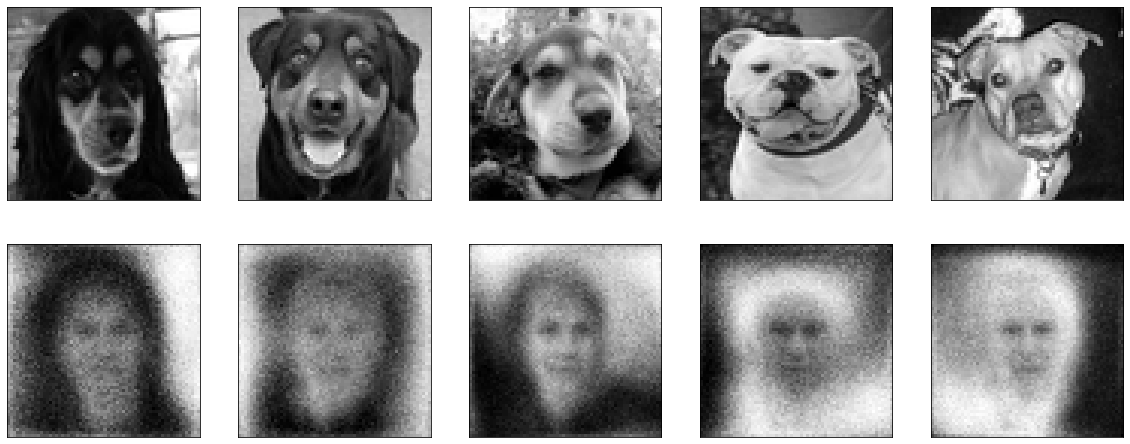

In [24]:
n = 5  # how many digits we will display
plt.figure(figsize=(20, 8))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(imgs[i].reshape(64, 64))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_img[i].reshape(64, 64))
#     plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

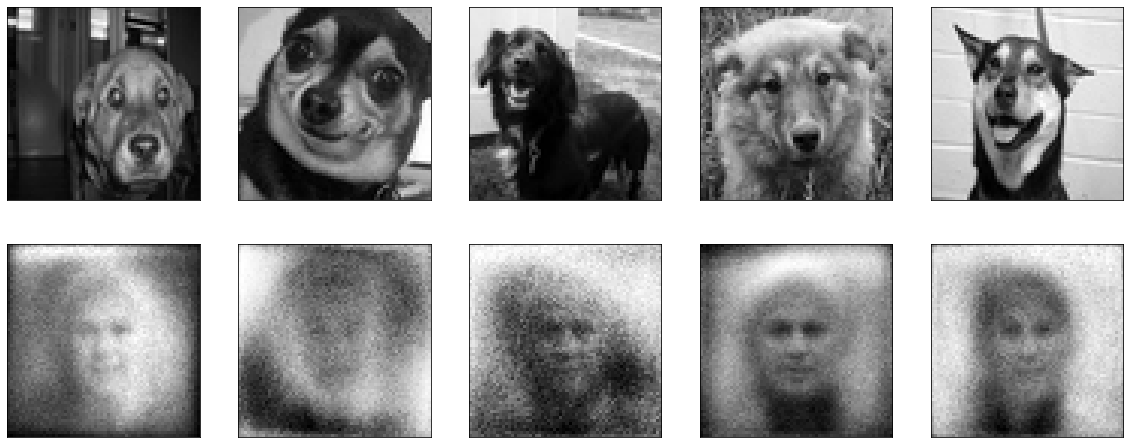

In [25]:
n = 5  # how many digits we will display
plt.figure(figsize=(20, 8))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(imgs[i+5].reshape(64, 64))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_img[i+5].reshape(64, 64))
#     plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()